# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np
# TODO: Number of training examples
n_train = x_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = x_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = (np.unique(y_train)).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

576
1


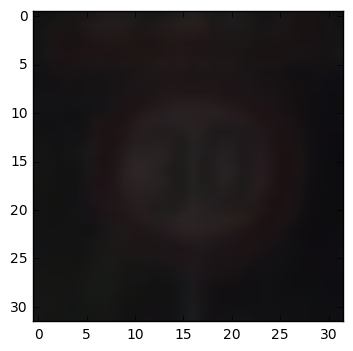

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from scipy import misc
from scipy import ndimage
import cv2
# Visualizations will be shown in the notebook.
import random 
%matplotlib inline

index = random.randint(0, len(x_train))
image = x_train[index].squeeze()
print (index)
plt.imshow(image, cmap="gray")
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

In [4]:
def convert_image_to_gray(data):
    # Convert image to grayscale
    return np.mean(data, axis=3)
    
def preprocess_data(data):
     
    # Mean Subtraction to center the data at the origin
    data -= np.mean(data)
    
    # Normalization
    data /= np.std(data)
    
    # PCA and whitening?
    return data

In [5]:
X_train_processed = preprocess_data(convert_image_to_gray(x_train))
X_train=X_train_processed.reshape(X_train_processed.shape[0],X_train_processed.shape[1],X_train_processed.shape[2],1)
print(X_train.shape)
X_test_processed = preprocess_data(convert_image_to_gray(X_test))
x_test=X_test_processed.reshape(X_test_processed.shape[0],X_test_processed.shape[1],X_test_processed.shape[2],1)
print(x_test.shape)

(39209, 32, 32, 1)
(12630, 32, 32, 1)


In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
import random 

print (X_train.shape)
#int(X_train.shape[0]*0.75)

jitterData_index=random.sample(range(0,X_train.shape[0]),int(X_train.shape[0]*0.3)  )
size_feature=np.array([len(jitterData_index)*6,X_train.shape[1],X_train.shape[2],X_train.shape[3]])
print(size_feature)
size_labes=np.array(len(jitterData_index)*6)

jitterDataset_feature=np.zeros(size_feature)
jitterDataset_labels=np.zeros(size_labes)
#print("random",jitterDataset.shape)
counter=0
for  index in jitterData_index:
    # scipy.ndimage.interpolation.rotate(input, angle, axes=(1, 0), reshape=True, output=None, order=3, #mode='constant', cval=0.0, prefilter=True)[source]
    image = X_train[index]
    Y_train_temp=y_train[index]
    
    X_train_rotate_Pos15=ndimage.interpolation.rotate(image,15,reshape=False)
    X_train_rotate_Neg15=ndimage.interpolation.rotate(image,-15,reshape=False)
    
    # scipy.ndimage.interpolation.shift(input, shift, output=None, order=3, mode='constant', cval=0.0, prefilter=True)[source]
    X_train_shift_Pos2=ndimage.interpolation.shift(image,2)
    X_train_Shift_Neg2=ndimage.interpolation.shift(image,-2)
    
    # scipy.ndimage.interpolation.zoom(input, zoom, output=None, order=3, mode='constant', cval=0.0, prefilter=True)[source]

    X_train_Zoom_Out_temp=ndimage.interpolation.zoom(image,1.1,output="uint8",mode="wrap")
    X_train_Zoom_Out=X_train_Zoom_Out_temp[0:32,0:32,:]
    
    
    X_train_Zoom_in_temp=ndimage.interpolation.zoom(image,0.9,output="uint8",mode="wrap")
    X_train_Zoom_in=np.zeros(image.shape,dtype=np.int)
    X_train_Zoom_in[0:29,0:29]=X_train_Zoom_in_temp;
    
    
    jitterDataset_feature[counter,:]=X_train_rotate_Pos15
    jitterDataset_labels[counter]=Y_train_temp
    counter+=1
    
    jitterDataset_feature[counter,:]=X_train_rotate_Neg15
    jitterDataset_labels[counter]=Y_train_temp
    counter+=1
    
    jitterDataset_feature[counter,:]=X_train_shift_Pos2
    jitterDataset_labels[counter]=Y_train_temp
    counter+=1
    
    jitterDataset_feature[counter,:]=X_train_Shift_Neg2
    jitterDataset_labels[counter]=Y_train_temp
    counter+=1
    
    jitterDataset_feature[counter,:]=X_train_Zoom_Out
    jitterDataset_labels[counter]=Y_train_temp
    counter+=1
    
    jitterDataset_feature[counter,:]=X_train_Zoom_in
    jitterDataset_labels[counter]=Y_train_temp
    counter+=1
    

    


(39209, 32, 32, 1)
[70572    32    32     1]


C:\Users\Niha\Anaconda\lib\site-packages\scipy\ndimage\interpolation.py:571: RuntimeWarning: invalid value encountered in true_divide
  zoom = (numpy.array(input.shape) - 1) / zoom_div
C:\Users\Niha\Anaconda\lib\site-packages\scipy\ndimage\interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [7]:

size_feature=np.array([jitterDataset_feature.shape[0]+X_train.shape[0],X_train.shape[1],X_train.shape[2],X_train.shape[3]])
print(size_feature)
X_trainNew=np.zeros(size_feature)
X_trainNew[0:X_train.shape[0]]=X_train
X_trainNew[X_train.shape[0]:size_feature[0]]=jitterDataset_feature



Y_train=np.zeros(y_train.shape+size_labes)
Y_train[0:y_train.shape[0]]=y_train
Y_train[y_train.shape[0]:Y_train.shape[0]]=jitterDataset_labels

print("New Dataset Size Training data set",X_trainNew.shape)
print("New Dataset Size labels ",Y_train.shape)


[109781     32     32      1]
New Dataset Size Training data set (109781, 32, 32, 1)
New Dataset Size labels  (109781,)


In [8]:
## Splitting tranning set and Validation set 

from sklearn import cross_validation
X_train,X_validation,y_train,y_validation=cross_validation.train_test_split(X_trainNew,Y_train, test_size=0.2, random_state=0)
print(X_train.shape)

(87824, 32, 32, 1)


**Answer:**
- **Converting the image to grayscale**: This is done for two reasons:
    1. Simplicity: Since color does not seem to be important but shape of sign is important 
    2. Data reduction: Processing only a single combined channel instead of three separate RGB channels reduces the amount of data to be processed by about 1/3 and allows the algorithm to run faster. However it comes at the cost of throwing away data (color data) that may be very helpful or required for many image processing applications.
    
- **Mean Subtraction**: This centers the cloud of data around the origin in every dimension.
- **Normalization**: Normalize the data dimensions so that they are of the same scale. The way I have done this is by dividing each dimension by its standard deviation once it has been zero-centered. This is not strictly needed for images because the relative scales of pixels are already approximately equal. This process causes each feature to have a similar range so that our gradients don't go out of control (and that we only need one global learning rate multiplier).
- **Image reshaping** - convolutions need the image data formatted as a cube (width by height by #channels)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I have generated about  dataset ,  I have build 6  transformed version of the origianl tranning set . I have 
1) **Rotated** by +15 and -15 
2) **Shift** by +2 and -2 pixel 
3) **Zommed out** by 1.1 and **zoomed in** by 0.9

I have generated these data just to make the training  more robust to such variation like translation , rotation and scaling 


In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [10]:
### Train your model here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [12]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 125

In [13]:
from tensorflow.contrib.layers import flatten
keep_prob = tf.placeholder(tf.float32)

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.01
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 30X30X16.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 32X32X6. Output = 15 X 15 X 16.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 13x13x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 16x16x64. Output = 5 x 5 X 64  .
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 8 X 8 X 64. Output = 4096.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 512), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(512))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, 86), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(86))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    #Dropout 
    
    
    h_fc1_drop = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(86, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(h_fc1_drop, fc3_W) + fc3_b
    
    return logits

In [14]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [15]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [17]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 0.8})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, "C:\\Users\\Niha\\Tensorflow\\Traffic.ckpt")
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.529

EPOCH 2 ...
Validation Accuracy = 0.640

EPOCH 3 ...
Validation Accuracy = 0.656



KeyboardInterrupt: 

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

1) I have used LeNet architecture with the addition to dropout before last full conected layer .

Optimizer I have used is "AdamOptimizer" with the "learning rate" of 0.001 .

Batch size : 125 
epoch is : 200 
Dropupt : 0.5 Wants to keep low initially 



### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I have used   LeNet architecture to solve the current Problem . 
I have used   I have played with number of stride of convlution network 



---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

**1)** last 2 Images are not present in given datasets


In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('C:\\Users\\Niha\\Tensorflow'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

In [ ]:
import pandas as pd

sign_names = pd.read_csv('signnames.csv')

def get_sign_name(class_index):
    row = sign_names[sign_names.ClassId == int(class_index)]
    return row.SignName.values[0]

def get_sign_names(indices):
    return [get_sign_name(index) for index in indices]

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('C:\\Users\\Niha\\Tensorflow'))
    
    images_fromWeb=["1.png","2.png","3.png","4.png","5.png"]
    
    for imageName in images_fromWeb:
        image = plt.imread(imageName)
        image_Reshape=image.reshape(1,32,32,3)
        prepossed_image=preprocess_data(convert_image_to_gray(image_Reshape))
        
        #value=np.zeros([1,batch_x.shape[0],batch_x.shape[1],batch_x.shape[2]])
        value=prepossed_image.reshape(1,32,32,1)
        print(value.shape)
        plt.figure()
        plt.imshow(prepossed_image)
        sfm=tf.nn.log_softmax(logits, dim=-1, name=None)
        top5Value=tf.nn.top_k(sfm, k=5)
        top5=sess.run(top5Value,feed_dict={x: value,keep_prob: 1.0})
        print(top5.indices)
        vf=top5.indices;
        print(get_sign_names(vf[0]))

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.